In [2]:
import pandas as pd
df = pd.read_csv("Supplement_Sales_Weekly_Expanded.csv")

df.info()
df.head(2)
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB
Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64


In [3]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=False)

df = df.drop_duplicates()
df = df.dropna(subset=['Date', 'Revenue'])

df['Location'] = df['Location'].astype(str).str.strip()
df['Product Name'] = df['Product Name'].astype(str).str.strip()
df['Category'] = df['Category'].astype(str).str.strip()
df['Platform'] = df['Platform'].astype(str).str.strip()

In [4]:
# Basic info check
print("Shape:", df.shape)
print("Date range:", df['Date'].min(), "to", df['Date'].max())
print("Unique Locations:", df['Location'].nunique())
print("Unique Categories:", df['Category'].nunique())
print("Unique Platforms:", df['Platform'].nunique())
print("\nMissing values per column:\n", df.isnull().sum())

df.head()

Shape: (4384, 10)
Date range: 2020-01-06 00:00:00 to 2025-03-31 00:00:00
Unique Locations: 3
Unique Categories: 10
Unique Platforms: 3

Missing values per column:
 Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64


,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


/tmp/ipython-input-301413297.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Date').resample('M')['Revenue'].sum()


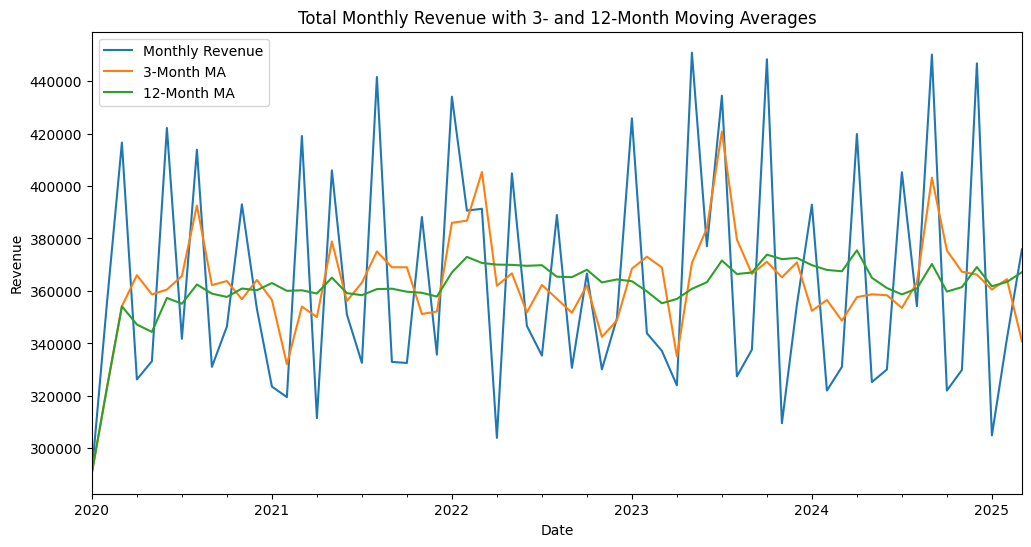

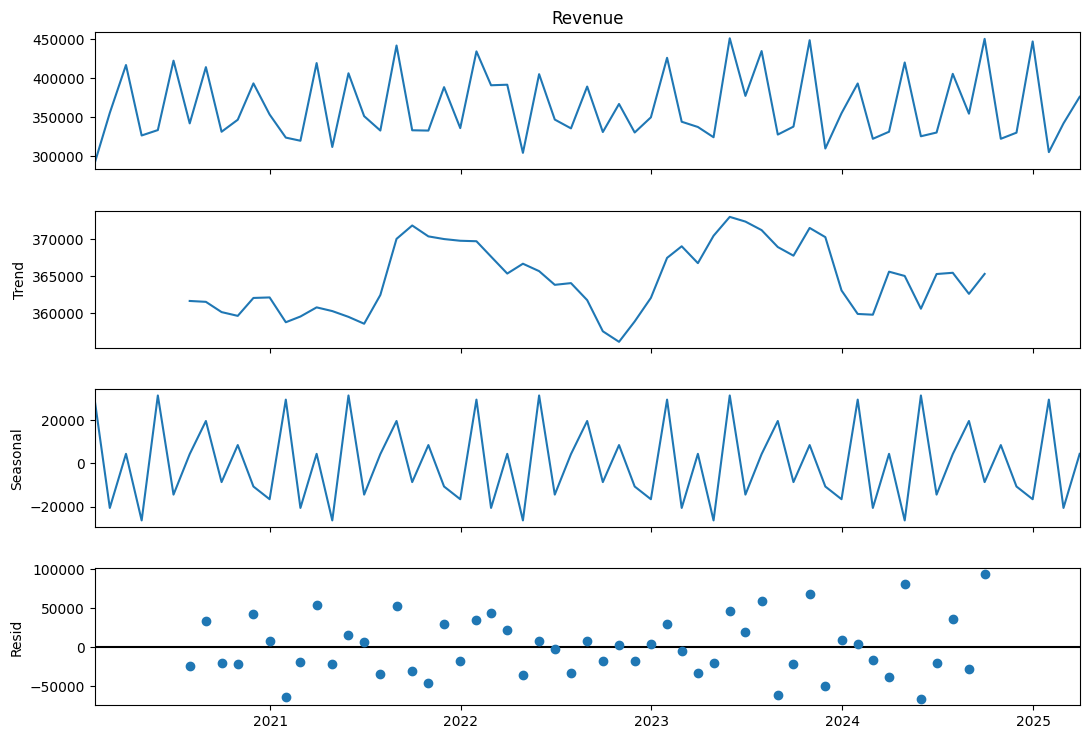

In [5]:
# ----- Total Monthly Revenue, Trend, and Seasonality Analysis -----

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

monthly_sales = df.set_index('Date').resample('M')['Revenue'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(label='Monthly Revenue')
monthly_sales.rolling(window=3, min_periods=1).mean().plot(label='3-Month MA')
monthly_sales.rolling(window=12, min_periods=1).mean().plot(label='12-Month MA')
plt.title('Total Monthly Revenue with 3- and 12-Month Moving Averages')
plt.ylabel('Revenue')
plt.legend()
plt.show()

monthly_interp = monthly_sales.interpolate()
decomp = seasonal_decompose(monthly_interp, model='additive', period=12)
fig = decomp.plot()
fig.set_size_inches(12,8)
plt.show()


/tmp/ipython-input-3387847163.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(['Category', pd.Grouper(key='Date', freq='M')])['Revenue']


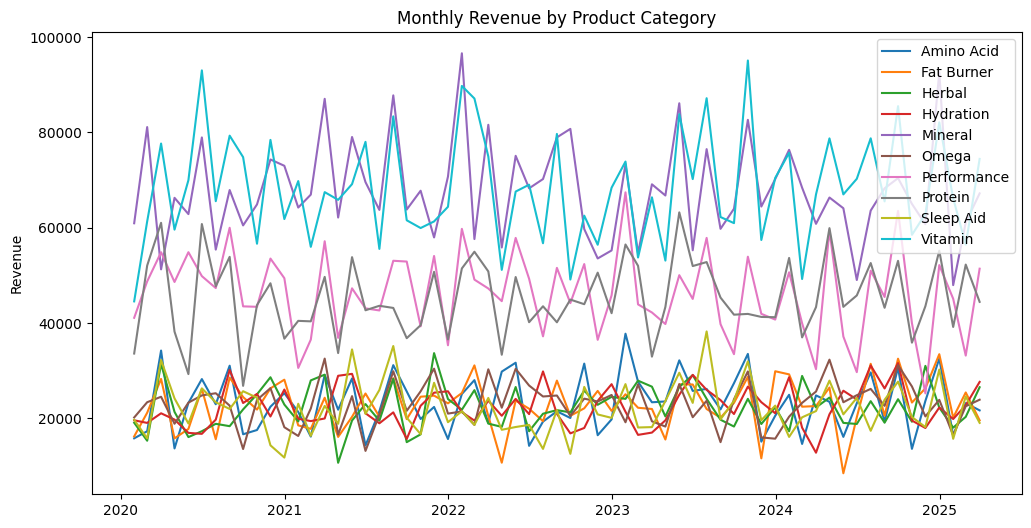

In [7]:
# ----- Monthly revenue by product category -----
monthly_by_category = (
    df.groupby(['Category', pd.Grouper(key='Date', freq='M')])['Revenue']
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))
for cat in monthly_by_category['Category'].unique():
    data = monthly_by_category[monthly_by_category['Category'] == cat]
    plt.plot(data['Date'], data['Revenue'], label=cat)
plt.title('Monthly Revenue by Product Category')
plt.ylabel('Revenue')
plt.legend()
plt.show()

/tmp/ipython-input-3013383762.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(['Location', pd.Grouper(key='Date', freq='M')])['Revenue']


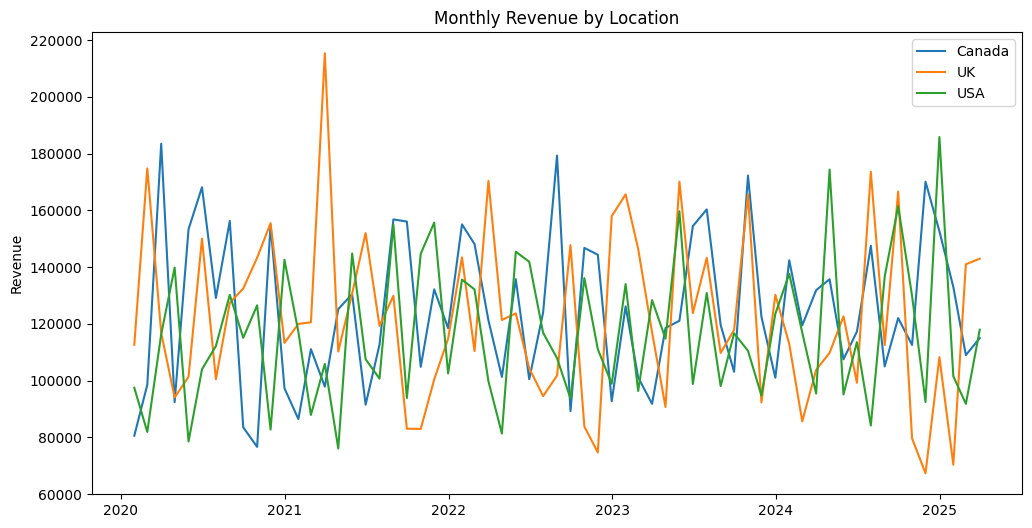

In [8]:

# ----- Monthly revenue by location -----
monthly_by_location = (
    df.groupby(['Location', pd.Grouper(key='Date', freq='M')])['Revenue']
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))
for loc in monthly_by_location['Location'].unique():
    data = monthly_by_location[monthly_by_location['Location'] == loc]
    plt.plot(data['Date'], data['Revenue'], label=loc)
plt.title('Monthly Revenue by Location')
plt.ylabel('Revenue')
plt.legend()
plt.show()

/tmp/ipython-input-828201291.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(['Platform', pd.Grouper(key='Date', freq='M')])['Revenue']


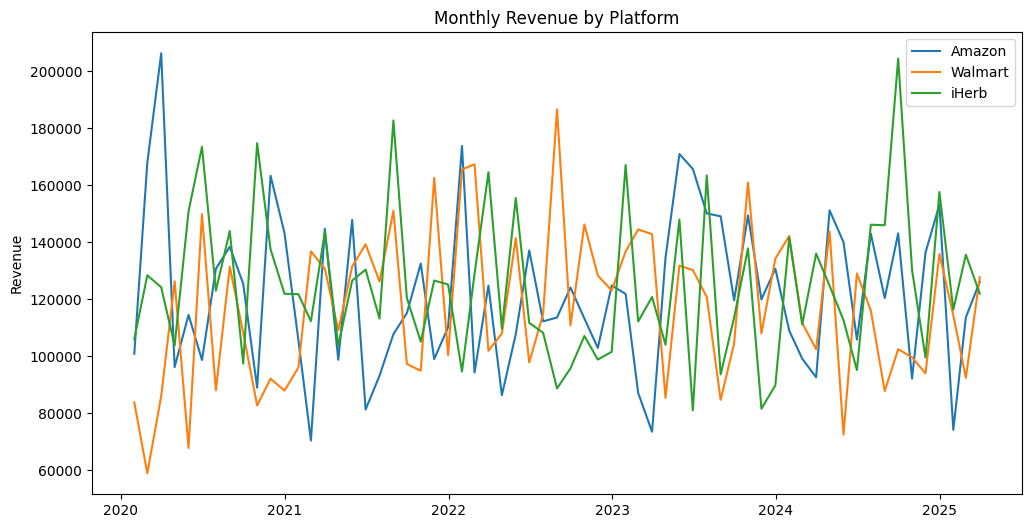

In [9]:
# ----- Monthly revenue by platform -----
monthly_by_platform = (
    df.groupby(['Platform', pd.Grouper(key='Date', freq='M')])['Revenue']
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))
for plat in monthly_by_platform['Platform'].unique():
    data = monthly_by_platform[monthly_by_platform['Platform'] == plat]
    plt.plot(data['Date'], data['Revenue'], label=plat)
plt.title('Monthly Revenue by Platform')
plt.ylabel('Revenue')
plt.legend()
plt.show()

/tmp/ipython-input-2446052399.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Date').resample('M')['Revenue'].sum()


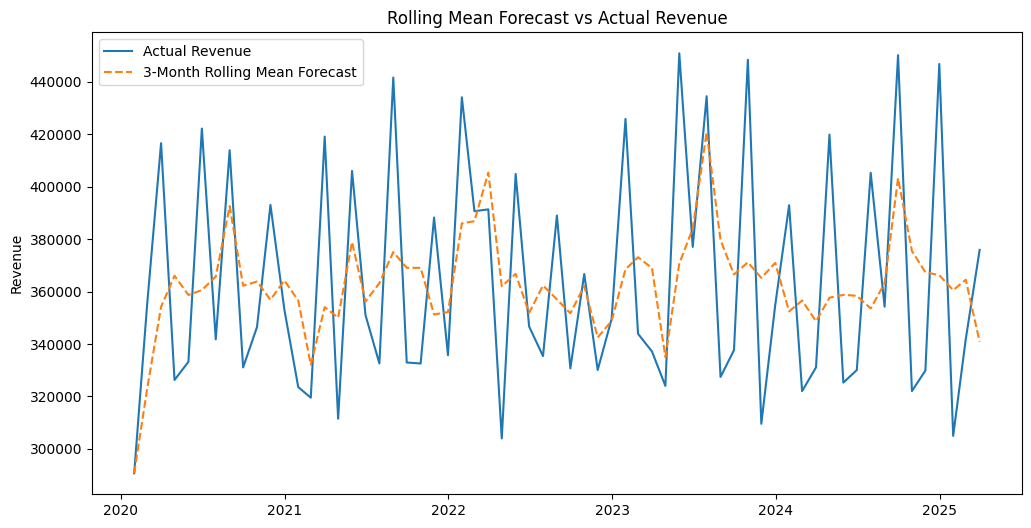

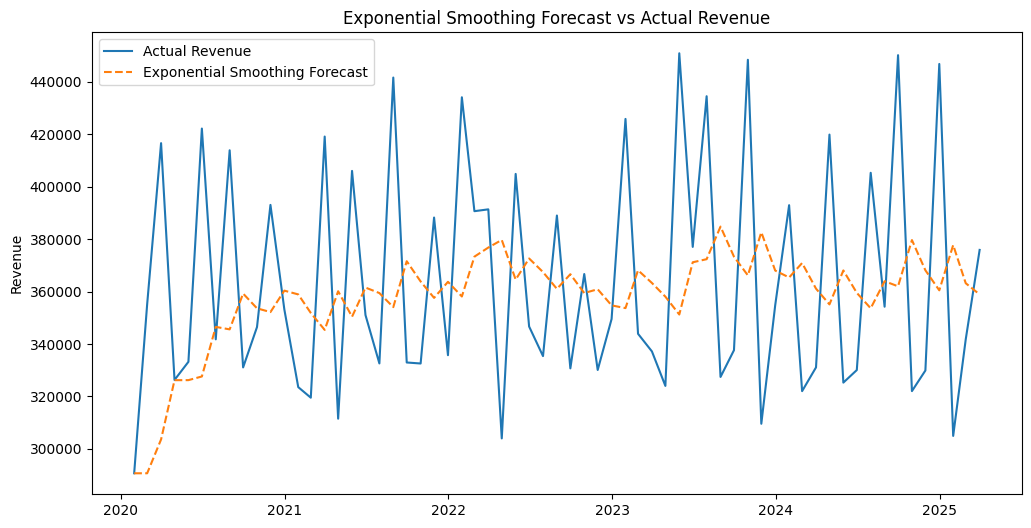

In [10]:
# ----- Simple Forecasting (Rolling Mean & Exponential Smoothing) -----
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

monthly_sales = df.set_index('Date').resample('M')['Revenue'].sum()

# ----- Rolling Mean Forecast -----
rolling_forecast = monthly_sales.rolling(window=3, min_periods=1).mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label='Actual Revenue')
plt.plot(rolling_forecast, label='3-Month Rolling Mean Forecast', linestyle='--')
plt.title('Rolling Mean Forecast vs Actual Revenue')
plt.ylabel('Revenue')
plt.legend()
plt.show()


# ----- Exponential Smoothing Forecast -----
model = SimpleExpSmoothing(monthly_sales).fit(smoothing_level=0.2, optimized=False)
exp_forecast = model.fittedvalues

plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label='Actual Revenue')
plt.plot(exp_forecast, label='Exponential Smoothing Forecast', linestyle='--')
plt.title('Exponential Smoothing Forecast vs Actual Revenue')
plt.ylabel('Revenue')
plt.legend()
plt.show()


In [11]:
# ----- Interactive Dashboard with Plotly -----
import plotly.express as px
import pandas as pd

# 1. Prepare aggregated data
monthly_sales = df.set_index('Date').resample('M')['Revenue'].sum().reset_index()
monthly_by_category = df.groupby(['Category', pd.Grouper(key='Date', freq='M')])['Revenue'].sum().reset_index()
monthly_by_location = df.groupby(['Location', pd.Grouper(key='Date', freq='M')])['Revenue'].sum().reset_index()
monthly_by_platform = df.groupby(['Platform', pd.Grouper(key='Date', freq='M')])['Revenue'].sum().reset_index()

# 2. Total Monthly Revenue
fig1 = px.line(monthly_sales, x='Date', y='Revenue', title='Total Monthly Revenue Trend')
fig1.show()

# 3. Monthly Revenue by Category
fig2 = px.line(monthly_by_category, x='Date', y='Revenue', color='Category', title='Revenue by Product Category')
fig2.show()

# 4. Monthly Revenue by Location
fig3 = px.line(monthly_by_location, x='Date', y='Revenue', color='Location', title='Revenue by Location')
fig3.show()

# 5. Monthly Revenue by Platform
fig4 = px.line(monthly_by_platform, x='Date', y='Revenue', color='Platform', title='Revenue by Platform')
fig4.show()


/tmp/ipython-input-651114244.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Date').resample('M')['Revenue'].sum().reset_index()
/tmp/ipython-input-651114244.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_by_category = df.groupby(['Category', pd.Grouper(key='Date', freq='M')])['Revenue'].sum().reset_index()
/tmp/ipython-input-651114244.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_by_location = df.groupby(['Location', pd.Grouper(key='Date', freq='M')])['Revenue'].sum().reset_index()
/tmp/ipython-input-651114244.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_by_platform = df.groupby(['Platform', pd.Grouper(key='Date', freq='M')])['Revenue'].sum().reset_index()
